<style>
    .title_container {
        margin: auto;
        background: rgb(81,92,103);
        background: linear-gradient(90deg, rgba(81,92,103,1) 36%, rgba(12,35,66,1) 62%);
        border-radius: 7px;
        color: white;
        text-align:center;
        width:75%;
        padding-top:2%;
        padding-bottom:2%;
    }
    
    .question_container {
        margin: auto;
        background: rgb(84,138,142);
        background: linear-gradient(90deg, rgba(84,138,142,1) 41%, rgba(145,201,73,1) 81%);
        border-radius: 7px;
        color: white;
        text-align:left;
        width:75%;
        padding-top:1%;
        padding-bottom:1%;
        padding-left: 2%;
        margin-top:2%;
    }
    
    .question_container p {
        font-size: 16px;
    }
    
    .alert_container {
        margin: auto;
        background: rgb(142,94,84);
        background: linear-gradient(128deg, rgba(142,94,84,1) 13%, rgba(201,103,73,1) 69%);
        border-radius: 7px;
        color: white;
        text-align:left;
        width:75%;
        padding-top:1%;
        padding-bottom:1%;
        padding-left: 2%;
        margin-top:2%;
    }
    
    .alert_container p {
        font-size: 16px;
    }
    
    .code_span {
        background-color: #E2E7EC;
        padding:2px;
        border-radius:1px;
        font-family: Consolas,monaco,monospace;
        color:black;
    }
</style>

<div class ='title_container'>
    <h1> Análisis de Datos II </h1>
    <h2> Profesor: Oldemar Rodríguez </h2>
    <h3> Estudiante: Jimmy Calvo Monge </h3>
    <h3> Carné: B31281 </h3>
    <hr style='color:white; width:80%;'>
    <h4> TAREA 9 </h4>
    <h4> Fecha de entrega: 30 de Octubre de 2022 </h4>
</div>

Importamos los módulos necesarios para resolver esta tarea.

In [75]:
### Basicos
import numpy as np
import pandas as pd
from pandas import DataFrame

### Utilidades/Varios
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.patches import Circle
from sklearn.tree import export_graphviz
from sklearn import tree
import seaborn as sns
import time
import graphviz
import os

### Training/Testing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### predictPy
from predictPy import Analisis_Predictivo

### ROC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

### Modelos:
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Arboles de Decision
from sklearn.tree import DecisionTreeClassifier
# Bosques Aleatorios
from sklearn.ensemble import RandomForestClassifier
# Ada Boost
from sklearn.ensemble import AdaBoostClassifier
# XG Boost
from sklearn.ensemble import GradientBoostingClassifier
# SVM
from sklearn.svm import SVC
# Bayes
from sklearn.naive_bayes import GaussianNB
# Discriminante
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import warnings
warnings.filterwarnings('ignore')

In [105]:
# real -> Clases Reales
# scores -> La probabilidad que retorna un modelo predictivo sobre un individuo de pertenecer a la clase positiva
# pos_label -> Indica cual es la clase positiva
# color -> Color de la curva
# label -> Etiqueta que aparece en la leyenda del gráfico
# ax -> axes object(Matplotlib)
def plotROC(real, scores, pos_label = 1, color = "tab:blue", label = None, ax = None):
    if ax == None:
        fig, ax = plt.subplots(1,1,figsize = (8,5), dpi = 200)
    fp_r, tp_r, umbral = roc_curve(real, scores, pos_label = pos_label)
    area = round(roc_auc_score(real, scores),3)
    if label != None:
        label = "{} (AUC: {})".format(label,area)
    else:
        label = "AUC: {}".format(area)
    ax.plot(fp_r, tp_r, lw = 1, color = color, label = label)
    ax.plot([0, 1], [0, 1], lw = 1, color = "black", linestyle='dashed')
    ax.set_xlabel("Tasa de Falsos Positivos")
    ax.set_ylabel("Tasa de Verdaderos Positivos")
    ax.set_title("Curva ROC")
    ax.legend(loc = "lower right")

<div class='question_container'>
    <h2> Pregunta 1 </h2>
    <p> La tabla de datos <code>novatosNBA.csv</code> contiene diferentes métricas de desempeño de novatos de la NBA en su primera temporada. Para esta tabla, las 21 primeras columnas corresponden a las variables predictoras y la variable Permanencia es la variable a predecir, la cual indica si el jugador permanece en la NBA luego de 5 años. La tabla contiene 1340 filas (individuos) y 21 columnas (variables), con la tabla realice lo siguiente: </p>
    <ul>
        <li> Usando Bosques Aleatorios con el 80% de los datos para la tabla aprendizaje y un 20% para la tabla testing determine la mejor Probabilidad de Corte, de forma tal que se prediga de la mejor manera posible la categoría 0 de la variable Permanencia, pero sin desmejorar de manera significativa la precisión de la categoría 1.</li>
        <li> Repita el ejercicio anterior usando XGBoosting. ¿Cambió la probabilidad de corte? Explique. </li>
    </ul>
</div>

In [3]:
datos_novatos=pd.read_csv("novatosNBA.csv",sep=";",index_col=0)
datos_novatos.head(5)

,PartidosJugados,MinutosJugados,PuntosPorJuego,PuntosCampoAnotados,PuntosCampoIntentados,PuntosCampoPorcentaje,Puntos3Anotados,Puntos3Intentados,Puntos3Porcentaje,TirosLibresRealizados,TirosLibresIntentados,TirosLibresPorcentaje,RebotesOfensivos,RebotesDefensivos,Rebotes,Asistencias,Robos,Bloqueos,PerdidaBalon,Permanencia
Nombre,,,,,,,,,,,,,,,,,,,,
Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [4]:
### Hay datos faltantes:
nas_dict={}
for col in datos_novatos.columns:
    nas_dict[col]=datos_novatos[col].isna().sum()
nas_dict

{'PartidosJugados': 0,
 'MinutosJugados': 0,
 'PuntosPorJuego': 0,
 'PuntosCampoAnotados': 0,
 'PuntosCampoIntentados': 0,
 'PuntosCampoPorcentaje': 0,
 'Puntos3Anotados': 0,
 'Puntos3Intentados': 0,
 'Puntos3Porcentaje': 11,
 'TirosLibresRealizados': 0,
 'TirosLibresIntentados': 0,
 'TirosLibresPorcentaje': 0,
 'RebotesOfensivos': 0,
 'RebotesDefensivos': 0,
 'Rebotes': 0,
 'Asistencias': 0,
 'Robos': 0,
 'Bloqueos': 0,
 'PerdidaBalon': 0,
 'Permanencia': 0}

In [5]:
datos_novatos=datos_novatos.dropna() ### Eliminamos los fatos faltantes por ahora.

In [7]:
instancia_bosques = RandomForestClassifier()

analisis_Novatos_bosques = Analisis_Predictivo(
    datos_novatos,
    predecir = "Permanencia",
    modelo = instancia_bosques, 
    train_size = 0.8,
)

Encontramos los índices de predicción para cada cada probabilidad de corte, los guardaremos en una lista. Hemos oimitido la impresión de los resultados para ahorrar espacio en la tarea.

In [37]:
cortes = [round(p,2) for p in list(np.linspace(0,1,21))] #Probamos 20 valores de corte.
indices = []
for c in cortes:
    analisis_Novatos_bosques.corte = c
    indices.append(analisis_Novatos_bosques.fit_predict_resultados(imprimir=False))

In [38]:
indices_df=pd.DataFrame({
    'prob_corte':cortes,
    'Precision Si':[ind['Precisión por categoría'].iloc[0,0] for ind in indices],
    'Precision No':[ind['Precisión por categoría'].iloc[0,1] for ind in indices],
})

In [39]:
indices_df.sort_values(by=['Precision Si'],ascending=False)

,prob_corte,Precision Si,Precision No
20,1.00,1.000000,0.000000
19,0.95,1.000000,0.000000
18,0.90,1.000000,0.000000
17,0.85,1.000000,0.000000
16,0.80,0.978947,0.017544
15,0.75,0.926316,0.017544
14,0.70,0.884211,0.052632
13,0.65,0.821053,0.052632
12,0.60,0.715789,0.111111
11,0.55,0.610526,0.116959


In [40]:
analisis_Novatos_bosques.datos[analisis_Novatos_bosques.predecir].unique()

array([0, 1], dtype=int64)

Note que con el corte por defecto de $0.5$ tenemos una precisión de $0.56$ en la clase del $0$ y de un $0.16$ en la clase del $1$. Podríamos elevar la probabilidad de corte a un $0.6$, y así incrementar la precisión de la clase del $0$ a un $0.71$, disminuyendo la precisión en la clase de $1$ a un $0.11$. Ya después de eso la precisión en la clase del $1$ cae mucho más de lo que podríamos sacrificar. (Claro, este sacrificio depende de los específicos del problema).

Hacemos lo mismo pero utilizando un clasificador de `XGBoost`.

In [42]:
instancia_xgb = GradientBoostingClassifier()

analisis_Novatos_xgb = Analisis_Predictivo(
    datos_novatos,
    predecir = "Permanencia",
    modelo = instancia_xgb, 
    train_size = 0.8,
)

In [51]:
cortes = [round(p,2) for p in list(np.linspace(0,1,21))] #Probamos 20 valores de corte.
indices_xgb = []
for c in cortes:
    analisis_Novatos_xgb.corte = c
    indices_xgb.append(analisis_Novatos_xgb.fit_predict_resultados(imprimir=False))

In [52]:
indices_df_xgb=pd.DataFrame({
    'prob_corte':cortes,
    'Precision Si':[ind['Precisión por categoría'].iloc[0,0] for ind in indices_xgb],
    'Precision No':[ind['Precisión por categoría'].iloc[0,1] for ind in indices_xgb],
})
indices_df_xgb.sort_values(by=['Precision Si'],ascending=False)

,prob_corte,Precision Si,Precision No
20,1.00,1.000000,0.00000
19,0.95,1.000000,0.00625
18,0.90,0.981132,0.00625
17,0.85,0.952830,0.01250
16,0.80,0.905660,0.03125
15,0.75,0.811321,0.05000
14,0.70,0.792453,0.10000
13,0.65,0.716981,0.13750
12,0.60,0.641509,0.19375
11,0.55,0.603774,0.21250


Note que en este caso podemos elevar la probabilidad de corte a $0.70$ para obtener una precisión del Si de $0.79$ y una del No de $0.10$ (Llegando a un caso similar al que obtuvimos al elevar la probabilidad de corte). Claramente la probabilidad de corte cambió en este caso, estamos utilizando otro modelo, el cual puede tener ventajas con respecto al anterior.

<div class='question_container'>
    <h2> Pregunta 2 </h2>
    <p> Utilizando nuevamente la tabla <code>novatosNBA.csv</code> realice lo siguiente:</p>
    <ul>
    <li> Compare todos los métodos predictivos vistos en el curso con esta tabla de datos utilizando la curva ROC y el área bajo la curva ROC. Aquí interesa predecir en la variable Permanencia. Compare los métodos SVM, KNN, Árboles, Bosques, ADA Boosting, eXtreme Gradient Boosting, Bayes, LDA y QDA. Utilice los parámetros por defecto o los que usted mejor considere.</li>
    <li> ¿Qué se puede concluir?</li>
    </ul>
</div>

Creamos una curva ROC y medimos el area bajo la curva para cada uno de los modelos que hemos estudiado en el curso hasta ahora. Por simplicidad utilizaré los parámetros por defecto.

In [87]:
modelos_ajustar=[]

# KNN
instancia_knn = KNeighborsClassifier()
modelos_ajustar.append({
    'nombre' : 'KNN',
    'instancia' : instancia_knn
})

# Arbol
instancia_arbol = DecisionTreeClassifier()
modelos_ajustar.append({
    'nombre' : 'Árbol de Decisión',
    'instancia' : instancia_arbol
})

# Bosques
instancia_bosques = RandomForestClassifier()
modelos_ajustar.append({
    'nombre' : 'Bosques Aleatorios',
    'instancia' : instancia_bosques
})

# ADA
instancia_tree = DecisionTreeClassifier(criterion="gini")
instancia_ada = AdaBoostClassifier(base_estimator=instancia_tree)
modelos_ajustar.append({
    'nombre' : 'AdaBoost',
    'instancia' : instancia_ada
})

# XGB
instancia_xgb = GradientBoostingClassifier()
modelos_ajustar.append({
    'nombre' : 'XGBoost',
    'instancia' : instancia_xgb
})

# SVM
instancia_svm = SVC(probability=True)
modelos_ajustar.append({
    'nombre' : 'SVM',
    'instancia' : instancia_svm
})

# Bayes
instancia_bayes=GaussianNB()
modelos_ajustar.append({
    'nombre' : 'Bayes',
    'instancia' : instancia_bayes
})

# LDA y QDA
instancia_lda = LinearDiscriminantAnalysis()
modelos_ajustar.append({
    'nombre' : 'LDA',
    'instancia' : instancia_lda
})
instancia_qda = QuadraticDiscriminantAnalysis()
modelos_ajustar.append({
    'nombre' : 'QDA',
    'instancia' : instancia_qda
})

In [88]:
# Variables Predictoras
X = datos_novatos.drop(['Permanencia'],axis=1)
# Variable a predecir
y = datos_novatos['Permanencia'].ravel()

#Partimos los datos en training-testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

#Estandarizamos los datos para aplicar SVM
X_train_scaled=X_train.copy()
X_test_scaled=X_test.copy()

for col in X_train.columns:
    sd_col=np.std(X_train[col])
    mean_col=np.mean(X_train[col])
    X_train_scaled[col]=[(obs-mean_col)/sd_col for obs in X_train[col]]
    X_test_scaled[col]=[(obs-mean_col)/sd_col for obs in X_test[col]]

Para cada modelo graficamos las curvas ROC's y además guardamos el área bajo la curva.
Podemos hacer esto directamente desde `sklearn`.

 Curva ROC para KNN


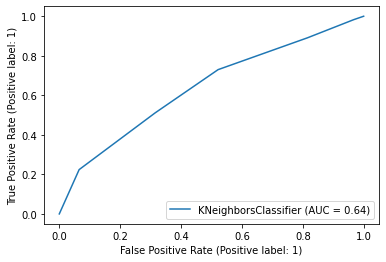

 Curva ROC para Árbol de Decisión


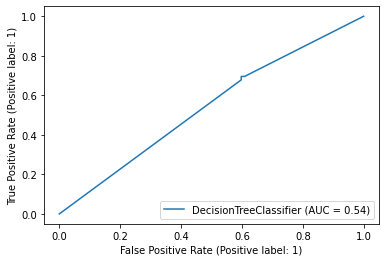

 Curva ROC para Bosques Aleatorios


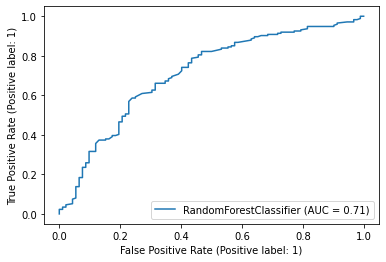

 Curva ROC para AdaBoost


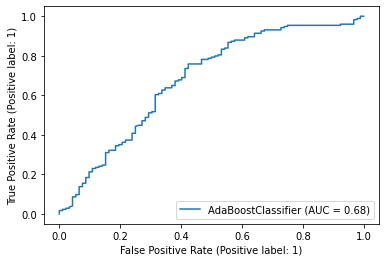

 Curva ROC para XGBoost


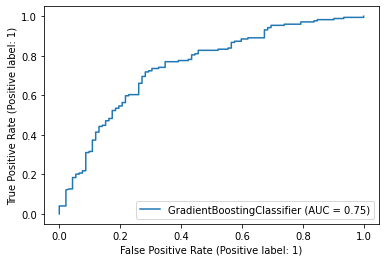

 Curva ROC para SVM


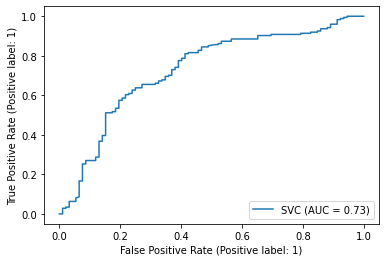

 Curva ROC para Bayes


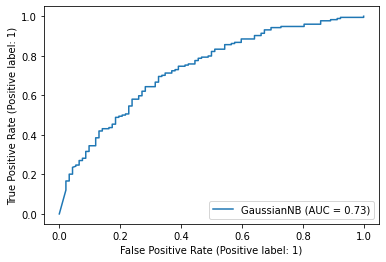

 Curva ROC para LDA


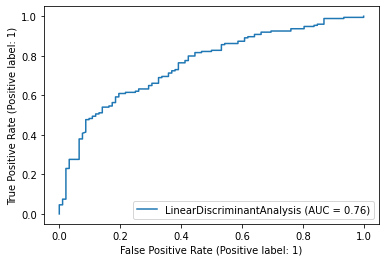

 Curva ROC para QDA


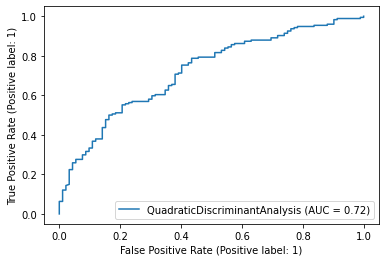

In [92]:
aucs=[]

for modelo in modelos_ajustar:
    modelo['instancia'].fit(X_train_scaled.values,y_train)
    print("============================")
    print(f" Curva ROC para {modelo['nombre']}")
    auc_este_modelo=roc_auc_score(y_test, modelo['instancia'].predict_proba(X_test_scaled)[:, 1])
    aucs.append({modelo['nombre'] : auc_este_modelo})
    plot_roc_curve(modelo['instancia'], X_test_scaled, y_test)
    plt.show()

Las áreas bajo la curva ROC que hemos obtenido para cada modelo son las siguientes:

In [93]:
aucs

[{'KNN': 0.6401486756621688},
 {'Árbol de Decisión': 0.5419790104947526},
 {'Bosques Aleatorios': 0.709832583708146},
 {'AdaBoost': 0.6784107946026987},
 {'XGBoost': 0.748594452773613},
 {'SVM': 0.7267303848075962},
 {'Bayes': 0.733164667666167},
 {'LDA': 0.7579022988505746},
 {'QDA': 0.7210457271364318}]

La máxima AUC que obtuvimos acá fue para el modelo de LDA. Note que las peores curvas, como las de KNN y Árbol de Decisión tienen pocas divisiones, y dan el área más baja. En general, las otras curvas tienen un comportamiento similar.

<div class='question_container'>
    <h2> Pregunta 3 </h2>
    <p> Dada la siguiente tabla: </p>
    <table>
      <tr>
        <th>Individuo</th>
        <th>Clase</th>
        <th>Score</th>
      </tr>
      <tr>
            <td>1</td>
            <td>P</td>
            <td>0.68</td>
        </tr>
        <tr>
            <td>2</td>
            <td>N</td>
            <td>0.16</td>
        </tr>
        <tr>
            <td>3</td>
            <td>N</td>
            <td>0.85</td>
        </tr>
        <tr>
            <td>4</td>
            <td>P</td>
            <td>0.21</td>
        </tr>
        <tr>
            <td>5</td>
            <td>N</td>
            <td>0.58</td>
        </tr>
        <tr>
            <td>6</td>
            <td>N</td>
            <td>0.66</td>
        </tr>
        <tr>
            <td>7</td>
            <td>N</td>
            <td>0.80</td>
        </tr>
        <tr>
            <td>8</td>
            <td>N</td>
            <td>0.29</td>
        </tr>
        <tr>
            <td>9</td>
            <td>N</td>
            <td>0.30</td>
        </tr>
        <tr>
            <td>10</td>
            <td>P</td>
            <td>0.51</td>
        </tr>
    </table>
    <ul>
        <li> Usando la definición de curva ROC calcule y grafique 'a mano' la curva ROC, use un umbral $T = 0$ y un paso de $0.1$. Es decir, debe hacerlo variando el umbral y calculando las matrices de confusión.</li>
        <li> Verifique el resultado anterior usando el código visto en clase, denominado <code>PROGRAMA 1</code>. </li>
        <li> Usando el algoritmo eficiente para la curva ROC calcule y grafique 'a mano' la curva ROC, use un umbral $T = 0.1$ y un paso de $0.1$. </li>
        <li> Verifique el resultado anterior usando el código visto en clase para el algoritmo eficiente, <code> PROGRAMA 2.</code> </li>
    </ul>
</div>

**Respuesta:**

*$T=0$*

Con el umbral de $T=0$ claramente nuestro punto de partida es el punto $(1,1)$ así que no calculamos la matriz de decisión allí.

$T = 0.1$
Aquí la tabla queda así:

| Individuo | Clase | Score | Clase Predicha |
| ---       | ---   | ---   | ---            |
| 1         | P     | 0.68  | P              |
| 2         | N     | 0.16  | P              |
| 3         | N     | 0.85  | P              |
| 4         | P     | 0.21  | P              |
| 5         | N     | 0.58  | P              |
| 6         | N     | 0.66  | P              |
| 7         | N     | 0.80  | P              |
| 8         | N     | 0.29  | P              |
| 9         | N     | 0.30  | P              |
| 10        | P     | 0.51  | P              |

De donde vemos que en este caso tenemos el mismo comportamiento del caso $T=0$, Así que el punto es $(1,1)$ nuevamente. 

$T = 0.2$
Aquí la tabla queda así:

| Individuo | Clase | Score | Clase Predicha |
| ---       | ---   | ---   | ---            |
| 1         | P     | 0.68  | P              |
| 2         | N     | 0.16  | N              |
| 3         | N     | 0.85  | P              |
| 4         | P     | 0.21  | P              |
| 5         | N     | 0.58  | P              |
| 6         | N     | 0.66  | P              |
| 7         | N     | 0.80  | P              |
| 8         | N     | 0.29  | P              |
| 9         | N     | 0.30  | P              |
| 10        | P     | 0.51  | P              |

Así que la matriz de confusión queda así:

|     |  N  |  P  |
| --- | --- | --- |
|  N  |  1  |  6  |
|  P  |  0  |  3  |

El punto a agregar es $P=(P_x,P_y)$ donde

- $P_x = 1- PN = \frac{FP}{TN+FP} = \frac{6}{1+6} = 0.8571 $ y 
- $P_y = PP = \frac{TP}{FN+TP} = \frac{3}{0+3} = 1 $

$T = 0.3$
Aquí la tabla queda así:

| Individuo | Clase | Score | Clase Predicha |
| ---       | ---   | ---   | ---            |
| 1         | P     | 0.68  | P              |
| 2         | N     | 0.16  | N              |
| 3         | N     | 0.85  | P              |
| 4         | P     | 0.21  | N              |
| 5         | N     | 0.58  | P              |
| 6         | N     | 0.66  | P              |
| 7         | N     | 0.80  | P              |
| 8         | N     | 0.29  | N              |
| 9         | N     | 0.30  | P              |
| 10        | P     | 0.51  | P              |

Así que la matriz de confusión queda así:

|     |  N  |  P  |
| --- | --- | --- |
|  N  |  2  |  5  |
|  P  |  1  |  2  |

El punto a agregar es $P=(P_x,P_y)$ donde

- $P_x = 1- PN = \frac{FP}{TN+FP} = \frac{5}{2+5} = 0.7142 $ y 
- $P_y = PP = \frac{TP}{FN+TP} = \frac{2}{1+2} = 0.6667 $

$T = 0.4$
Aquí la tabla queda así:

| Individuo | Clase | Score | Clase Predicha |
| ---       | ---   | ---   | ---            |
| 1         | P     | 0.68  | P              |
| 2         | N     | 0.16  | N              |
| 3         | N     | 0.85  | P              |
| 4         | P     | 0.21  | N              |
| 5         | N     | 0.58  | P              |
| 6         | N     | 0.66  | P              |
| 7         | N     | 0.80  | P              |
| 8         | N     | 0.29  | N              |
| 9         | N     | 0.30  | N              |
| 10        | P     | 0.51  | P              |

Así que la matriz de confusión queda así:

|     |  N  |  P  |
| --- | --- | --- |
|  N  |  3  |  4  |
|  P  |  1  |  2  |

El punto a agregar es $P=(P_x,P_y)$ donde

- $P_x = 1- PN = \frac{FP}{TN+FP} = \frac{4}{3+4} = 0.5714 $ y 
- $P_y = PP = \frac{TP}{FN+TP} = \frac{2}{1+2} = 0.6667 $

$T = 0.5$
Aquí la tabla queda así:

| Individuo | Clase | Score | Clase Predicha |
| ---       | ---   | ---   | ---            |
| 1         | P     | 0.68  | P              |
| 2         | N     | 0.16  | N              |
| 3         | N     | 0.85  | P              |
| 4         | P     | 0.21  | N              |
| 5         | N     | 0.58  | P              |
| 6         | N     | 0.66  | P              |
| 7         | N     | 0.80  | P              |
| 8         | N     | 0.29  | N              |
| 9         | N     | 0.30  | N              |
| 10        | P     | 0.51  | P              |

Tenemos el mismo caso del punto anterior.

$T = 0.6$
Aquí la tabla queda así:

| Individuo | Clase | Score | Clase Predicha |
| ---       | ---   | ---   | ---            |
| 1         | P     | 0.68  | P              |
| 2         | N     | 0.16  | N              |
| 3         | N     | 0.85  | P              |
| 4         | P     | 0.21  | N              |
| 5         | N     | 0.58  | N              |
| 6         | N     | 0.66  | P              |
| 7         | N     | 0.80  | P              |
| 8         | N     | 0.29  | N              |
| 9         | N     | 0.30  | N              |
| 10        | P     | 0.51  | N              |

Así que la matriz de confusión queda así:

|     |  N  |  P  |
| --- | --- | --- |
|  N  |  4  |  3  |
|  P  |  2  |  1  |

El punto a agregar es $P=(P_x,P_y)$ donde

- $P_x = 1- PN = \frac{FP}{TN+FP} = \frac{3}{4+3} = 0.4285 $ y 
- $P_y = PP = \frac{TP}{FN+TP} = \frac{1}{2+1} = 0.3333 $

$T = 0.7$
Aquí la tabla queda así:

| Individuo | Clase | Score | Clase Predicha |
| ---       | ---   | ---   | ---            |
| 1         | P     | 0.68  | N              |
| 2         | N     | 0.16  | N              |
| 3         | N     | 0.85  | P              |
| 4         | P     | 0.21  | N              |
| 5         | N     | 0.58  | N              |
| 6         | N     | 0.66  | N              |
| 7         | N     | 0.80  | P              |
| 8         | N     | 0.29  | N              |
| 9         | N     | 0.30  | N              |
| 10        | P     | 0.51  | N              |

Así que la matriz de confusión queda así:

|     |  N  |  P  |
| --- | --- | --- |
|  N  |  5  |  2  |
|  P  |  3  |  0  |

El punto a agregar es $P=(P_x,P_y)$ donde

- $P_x = 1- PN = \frac{FP}{TN+FP} = \frac{2}{5+2} = 0.2857 $ y 
- $P_y = PP = \frac{TP}{FN+TP} = \frac{0}{3+0} = 0 $

$T = 0.8$
Aquí la tabla queda así:

| Individuo | Clase | Score | Clase Predicha |
| ---       | ---   | ---   | ---            |
| 1         | P     | 0.68  | N              |
| 2         | N     | 0.16  | N              |
| 3         | N     | 0.85  | P              |
| 4         | P     | 0.21  | N              |
| 5         | N     | 0.58  | N              |
| 6         | N     | 0.66  | N              |
| 7         | N     | 0.80  | N              |
| 8         | N     | 0.29  | N              |
| 9         | N     | 0.30  | N              |
| 10        | P     | 0.51  | N              |

Así que la matriz de confusión queda así:

|     |  N  |  P  |
| --- | --- | --- |
|  N  |  6  |  1  |
|  P  |  3  |  0  |

El punto a agregar es $P=(P_x,P_y)$ donde

- $P_x = 1- PN = \frac{FP}{TN+FP} = \frac{1}{6+1} = 0.1428 $ y 
- $P_y = PP = \frac{TP}{FN+TP} = \frac{0}{3+0} = 0 $

$T = 0.9$
Aquí la tabla queda así:

| Individuo | Clase | Score | Clase Predicha |
| ---       | ---   | ---   | ---            |
| 1         | P     | 0.68  | N              |
| 2         | N     | 0.16  | N              |
| 3         | N     | 0.85  | N              |
| 4         | P     | 0.21  | N              |
| 5         | N     | 0.58  | N              |
| 6         | N     | 0.66  | N              |
| 7         | N     | 0.80  | N              |
| 8         | N     | 0.29  | N              |
| 9         | N     | 0.30  | N              |
| 10        | P     | 0.51  | N              |

Así que la matriz de confusión queda así:

|     |  N  |  P  |
| --- | --- | --- |
|  N  |  7  |  0  |
|  P  |  3  |  0  |

El punto a agregar es $P=(P_x,P_y)$ donde

- $P_x = 1- PN = \frac{FP}{TN+FP} = \frac{0}{7+0} = 0 $ y 
- $P_y = PP = \frac{TP}{FN+TP} = \frac{0}{3+0} = 0 $

Con esto terminamos el algoritmo (Claramente con $T=1$ tendremos el punto $(0,0)$ también). Los puntos que obtuvimos para cada umbral fueron:

- $ T = 0 $: $P=(1,1)$
- $ T = 0.1 $: $P=(1,1)$
- $ T = 0.2 $: $P=(0.85,1)$
- $ T = 0.3 $: $P=(0.71,0.67)$
- $ T = 0.4 $: $P=(0.57,0.67)$
- $ T = 0.5 $: $P=(0.57,0.67)$
- $ T = 0.6 $: $P=(0.42,0.33)$
- $ T = 0.7 $: $P=(0.28,0)$
- $ T = 0.8 $: $P=(0.14,0)$
- $ T = 0.9 $: $P=(0,0)$
- $ T = 1 $: $P=(,)$

La curva ROC que he graficado se encuentra adjunta en el archivo `Tarea9_Jimmy_Calvo_Monge_CurvaROC.png`

Verificamos nuestros cálculos con el código visto en clase.

Punto i =  1 

Umbral = T =  0.0 

MC =
[[0 7]
 [0 3]] 

Tasa FP =  1.0 

Tasa TP =  1.0
Punto i =  2 

Umbral = T =  0.2 

MC =
[[1 6]
 [0 3]] 

Tasa FP =  0.86 

Tasa TP =  1.0
Punto i =  3 

Umbral = T =  0.3 

MC =
[[3 4]
 [1 2]] 

Tasa FP =  0.57 

Tasa TP =  0.67
Punto i =  4 

Umbral = T =  0.6 

MC =
[[4 3]
 [2 1]] 

Tasa FP =  0.43 

Tasa TP =  0.33
Punto i =  5 

Umbral = T =  0.7 

MC =
[[5 2]
 [3 0]] 

Tasa FP =  0.29 

Tasa TP =  0.0
Punto i =  6 

Umbral = T =  0.9 

MC =
[[7 0]
 [3 0]] 

Tasa FP =  0.0 

Tasa TP =  0.0


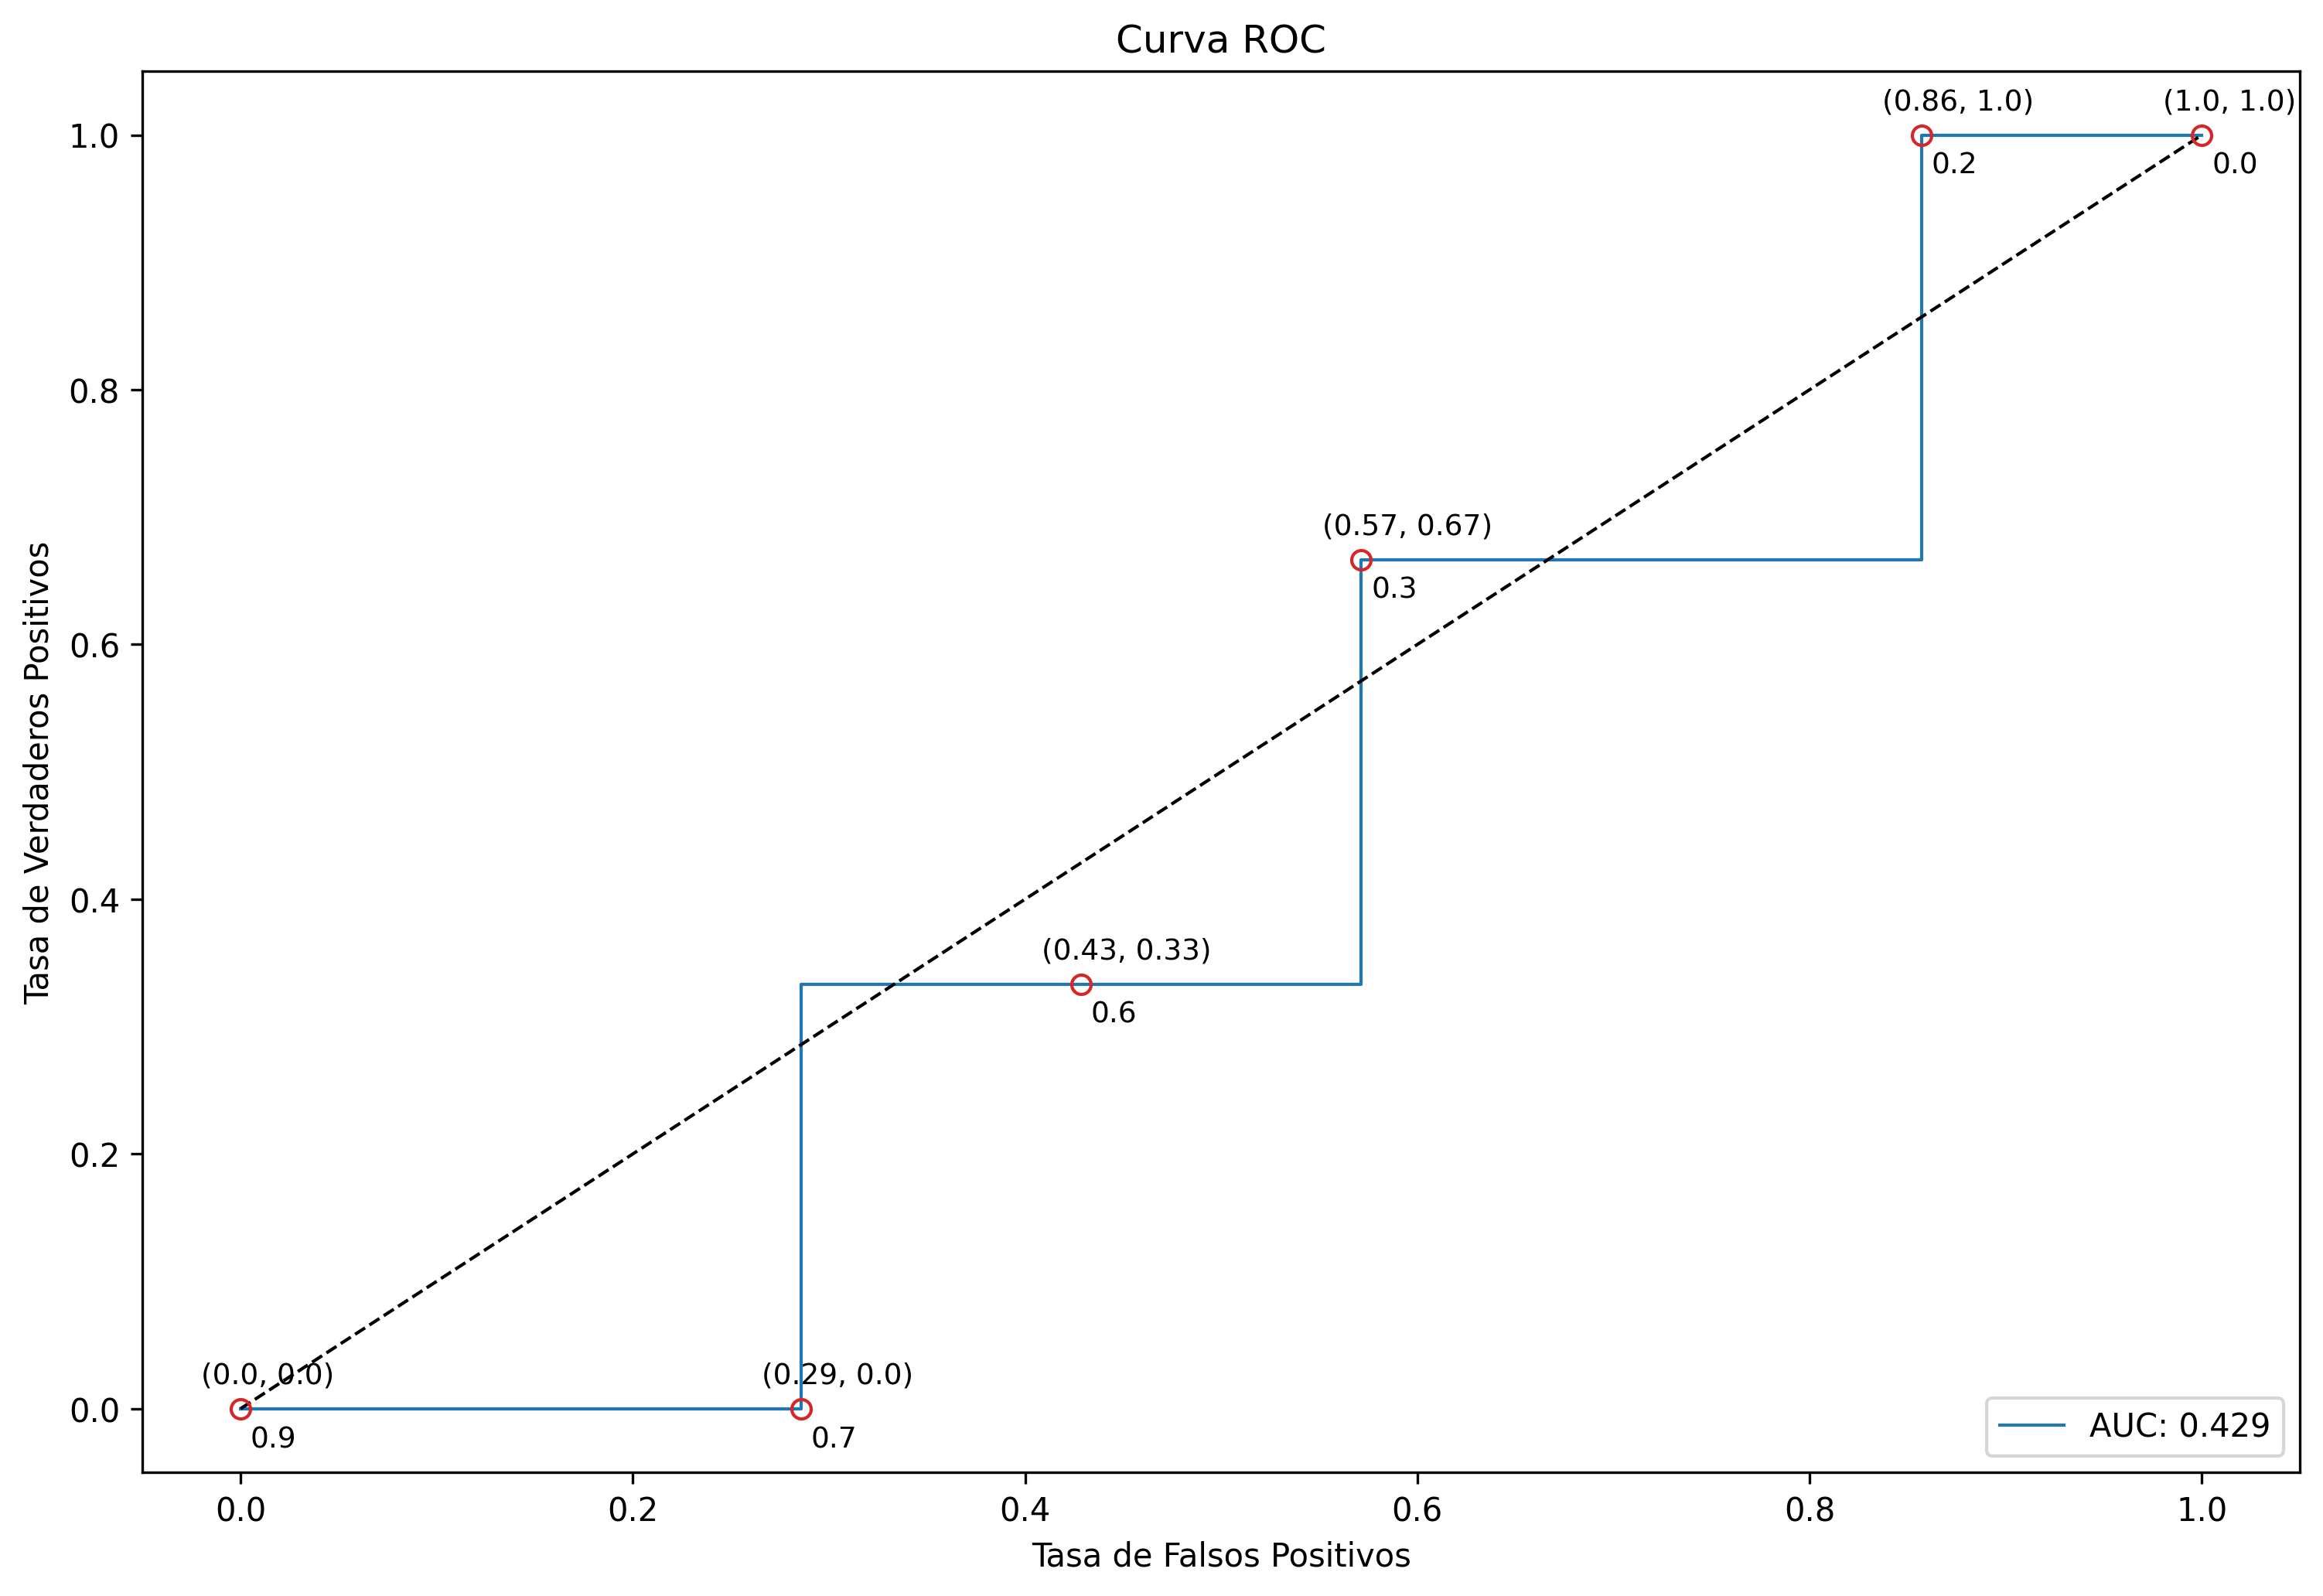

In [122]:
Clase = np.array(["p", "n", "n", "p", "n", "n", "n", "n", "n", "p"])
Score = np.array([0.68, 0.16, 0.85, 0.21, 0.58, 0.66, 0.80, 0.29, 0.30, 0.51])

fig, ax = plt.subplots(1,1,figsize = (12,8), dpi = 300)

#Graficamos la curva ROC
plotROC(Clase, Score, pos_label = "p", ax = ax)


# Graficamos puntos con el siguiente algoritmo
i = 1  # Contador
FP_r = -1  # Para que entre al condicional en la primera iteración
TP_r = -1  # Para que entre al condicional en la primera iteración

for Umbral in np.arange(0,1,0.1):
    
    Prediccion = np.where(Score >= Umbral, "p", "n")
    MC = confusion_matrix(Clase, Prediccion)
    
    if (FP_r != MC[0, 1] / sum(MC[0, ])) | (TP_r != MC[1, 1] / sum(MC[1, ])):  
        
            FP_r = MC[0, 1] / sum(MC[0, ])  # Tasa de Falsos Positivos
            TP_r = MC[1, 1] / sum(MC[1, ])  # Tasa de Verdaderos Positivos  
            
            # Graficamos punto
            plt.plot(FP_r, TP_r, "o", mfc = "none", color = "tab:red")
            plt.annotate("({}, {})".format(round(FP_r,2),round(TP_r,2)), 
                         (FP_r - 0.02 ,TP_r + 0.02), fontsize = 9)
            plt.annotate(round(Umbral, 3), (FP_r + 0.005, TP_r - 0.03), fontsize = 9)
            
            # Imprimimos resultado
            print("=====================")
            print("Punto i = ", i, "\n")  
            print("Umbral = T = ", round(Umbral, 3), "\n")
            print("MC =")
            print(MC, "\n")
            print("Tasa FP = ", round(FP_r, 2), "\n")
            print("Tasa TP = ", round(TP_r, 2))     
            i = i + 1

En efecto nuestros cálculos concuerdan con lo que enseña el algoritmo hecho en clase.

**Con el algoritmo eficiente**
Primero ordenamos los datos usando `Score` de manera descendiente.

In [123]:
datos = pd.DataFrame({
    'Clase' : Clase,
    'Score' : Score
}).sort_values(by=['Score'],ascending=False)
datos

,Clase,Score
2,n,0.85
6,n,0.80
0,p,0.68
5,n,0.66
4,n,0.58
9,p,0.51
8,n,0.30
7,n,0.29
3,p,0.21
1,n,0.16


Aquí tenemos $N=7$ y $P=3$. 

- $i=1$
- $T=0.1$
- $S = $ Score[i] = $0.85$
- $T < S $ y Clase = $N$
- $\Rightarrow$ $TP=0$ y $FP=FP+1=1$
- El punto a agregar es $\left(\frac{FP}{N},\frac{TP}{P}\right)=\left(\frac{1}{7},\frac{0}{3}\right)=(0.1421,0)$

- $i=2$
- $T=0.2$
- $S = $ Score[i] = $0.80$
- $T < S $ y Clase = $N$
- $\Rightarrow$ $TP=0$ y $FP=FP+1=2$
- El punto a agregar es $\left(\frac{FP}{N},\frac{TP}{P}\right)=\left(\frac{2}{7},\frac{0}{3}\right)=(0.2857,0)$

- $i=3$
- $T=0.3$
- $S = $ Score[i] = $0.68$
- $T < S $ y Clase = $P$
- $\Rightarrow$ $TP=TP+1=1$ y $FP=2$
- El punto a agregar es $\left(\frac{FP}{N},\frac{TP}{P}\right)=\left(\frac{2}{7},\frac{1}{3}\right)=(0.2857,0.333)$

- $i=4$
- $T=0.4$
- $S = $ Score[i] = $0.66$
- $T < S $ y Clase = $N$
- $\Rightarrow$ $TP=1$ y $FP=FP+1=3$
- El punto a agregar es $\left(\frac{FP}{N},\frac{TP}{P}\right)=\left(\frac{3}{7},\frac{1}{3}\right)=(0.4286,0.333)$

- $i=5$
- $T=0.5$
- $S = $ Score[i] = $0.58$
- $T < S $ y Clase = $N$
- $\Rightarrow$ $TP=1$ y $FP=FP+1=4$
- El punto a agregar es $\left(\frac{FP}{N},\frac{TP}{P}\right)=(\frac{4}{7},\frac{1}{3})=(0.5714,0.333)$

A partir de aquí todo es al revés

- $i=6$
- $T=0.6$
- $S = $ Score[i] = $0.51$
- $S < T $ y Clase = $P$
- $\Rightarrow$ $TP=TP+1=2$ y $FP=4$
- El punto a agregar es $\left(\frac{FP}{N},\frac{TP}{P}\right)=\left(\frac{4}{7},\frac{2}{3})=(0.5714,0.6667\right)$

- $i=7$
- $T=0.7$
- $S = $ Score[i] = $0.30$
- $S < T $ y Clase = $N$
- $\Rightarrow$ $TP=2$ y $FP=FP+1=5$
- El punto a agregar es $\left(\frac{FP}{N},\frac{TP}{P}\right)=\left(\frac{5}{7},\frac{2}{3}\right)=(0.7142,0.6667)$

- $i=8$
- $T=0.8$
- $S = $ Score[i] = $0.29$
- $S < T $ y Clase = $N$
- $\Rightarrow$ $TP=2$ y $FP=FP+1=6$
- El punto a agregar es $\left(\frac{FP}{N},\frac{TP}{P}\right)=\left(\frac{6}{7},\frac{3}{3}\right)=(0.8571,0.6667)$

- $i=9$
- $T=0.9$
- $S = $ Score[i] = $0.21$
- $S < T $ y Clase = $P$
- $\Rightarrow$ $TP=TP+1=3$ y $FP=6$
- El punto a agregar es $\left(\frac{FP}{N},\frac{TP}{P}\right)=(\frac{6}{7},\frac{3}{3})=(0.8571,1)$

- $i=10$
- $T=1$
- $S = $ Score[i] = $0.16$
- $S < T $ y Clase = $N$
- $\Rightarrow$ $TP=3$ y $FP=FP+1=7$
- El punto a agregar es $\left(\frac{FP}{N},\frac{TP}{P}\right)=(\frac{7}{7},\frac{3}{3})=(1,1)$

Verificamos los cálculos con el `PROGRAMA 2`. Visto en clase.

['n' 'n' 'p' 'n' 'n' 'p' 'n' 'n' 'p' 'n']
[0.85 0.8  0.68 0.66 0.58 0.51 0.3  0.29 0.21 0.16]
Punto i =  1 

Umbral = T =  0.1 

Tasa FP =  0.14 

Tasa TP =  0.0 


Punto i =  2 

Umbral = T =  0.2 

Tasa FP =  0.29 

Tasa TP =  0.0 


Punto i =  3 

Umbral = T =  0.3 

Tasa FP =  0.29 

Tasa TP =  0.33 


Punto i =  4 

Umbral = T =  0.4 

Tasa FP =  0.43 

Tasa TP =  0.33 


Punto i =  5 

Umbral = T =  0.5 

Tasa FP =  0.57 

Tasa TP =  0.33 


Punto i =  6 

Umbral = T =  0.6 

Tasa FP =  0.57 

Tasa TP =  0.67 


Punto i =  7 

Umbral = T =  0.7 

Tasa FP =  0.71 

Tasa TP =  0.67 


Punto i =  8 

Umbral = T =  0.8 

Tasa FP =  0.86 

Tasa TP =  0.67 


Punto i =  9 

Umbral = T =  0.9 

Tasa FP =  0.86 

Tasa TP =  1.0 


Punto i =  10 

Umbral = T =  1.0 

Tasa FP =  1.0 

Tasa TP =  1.0 




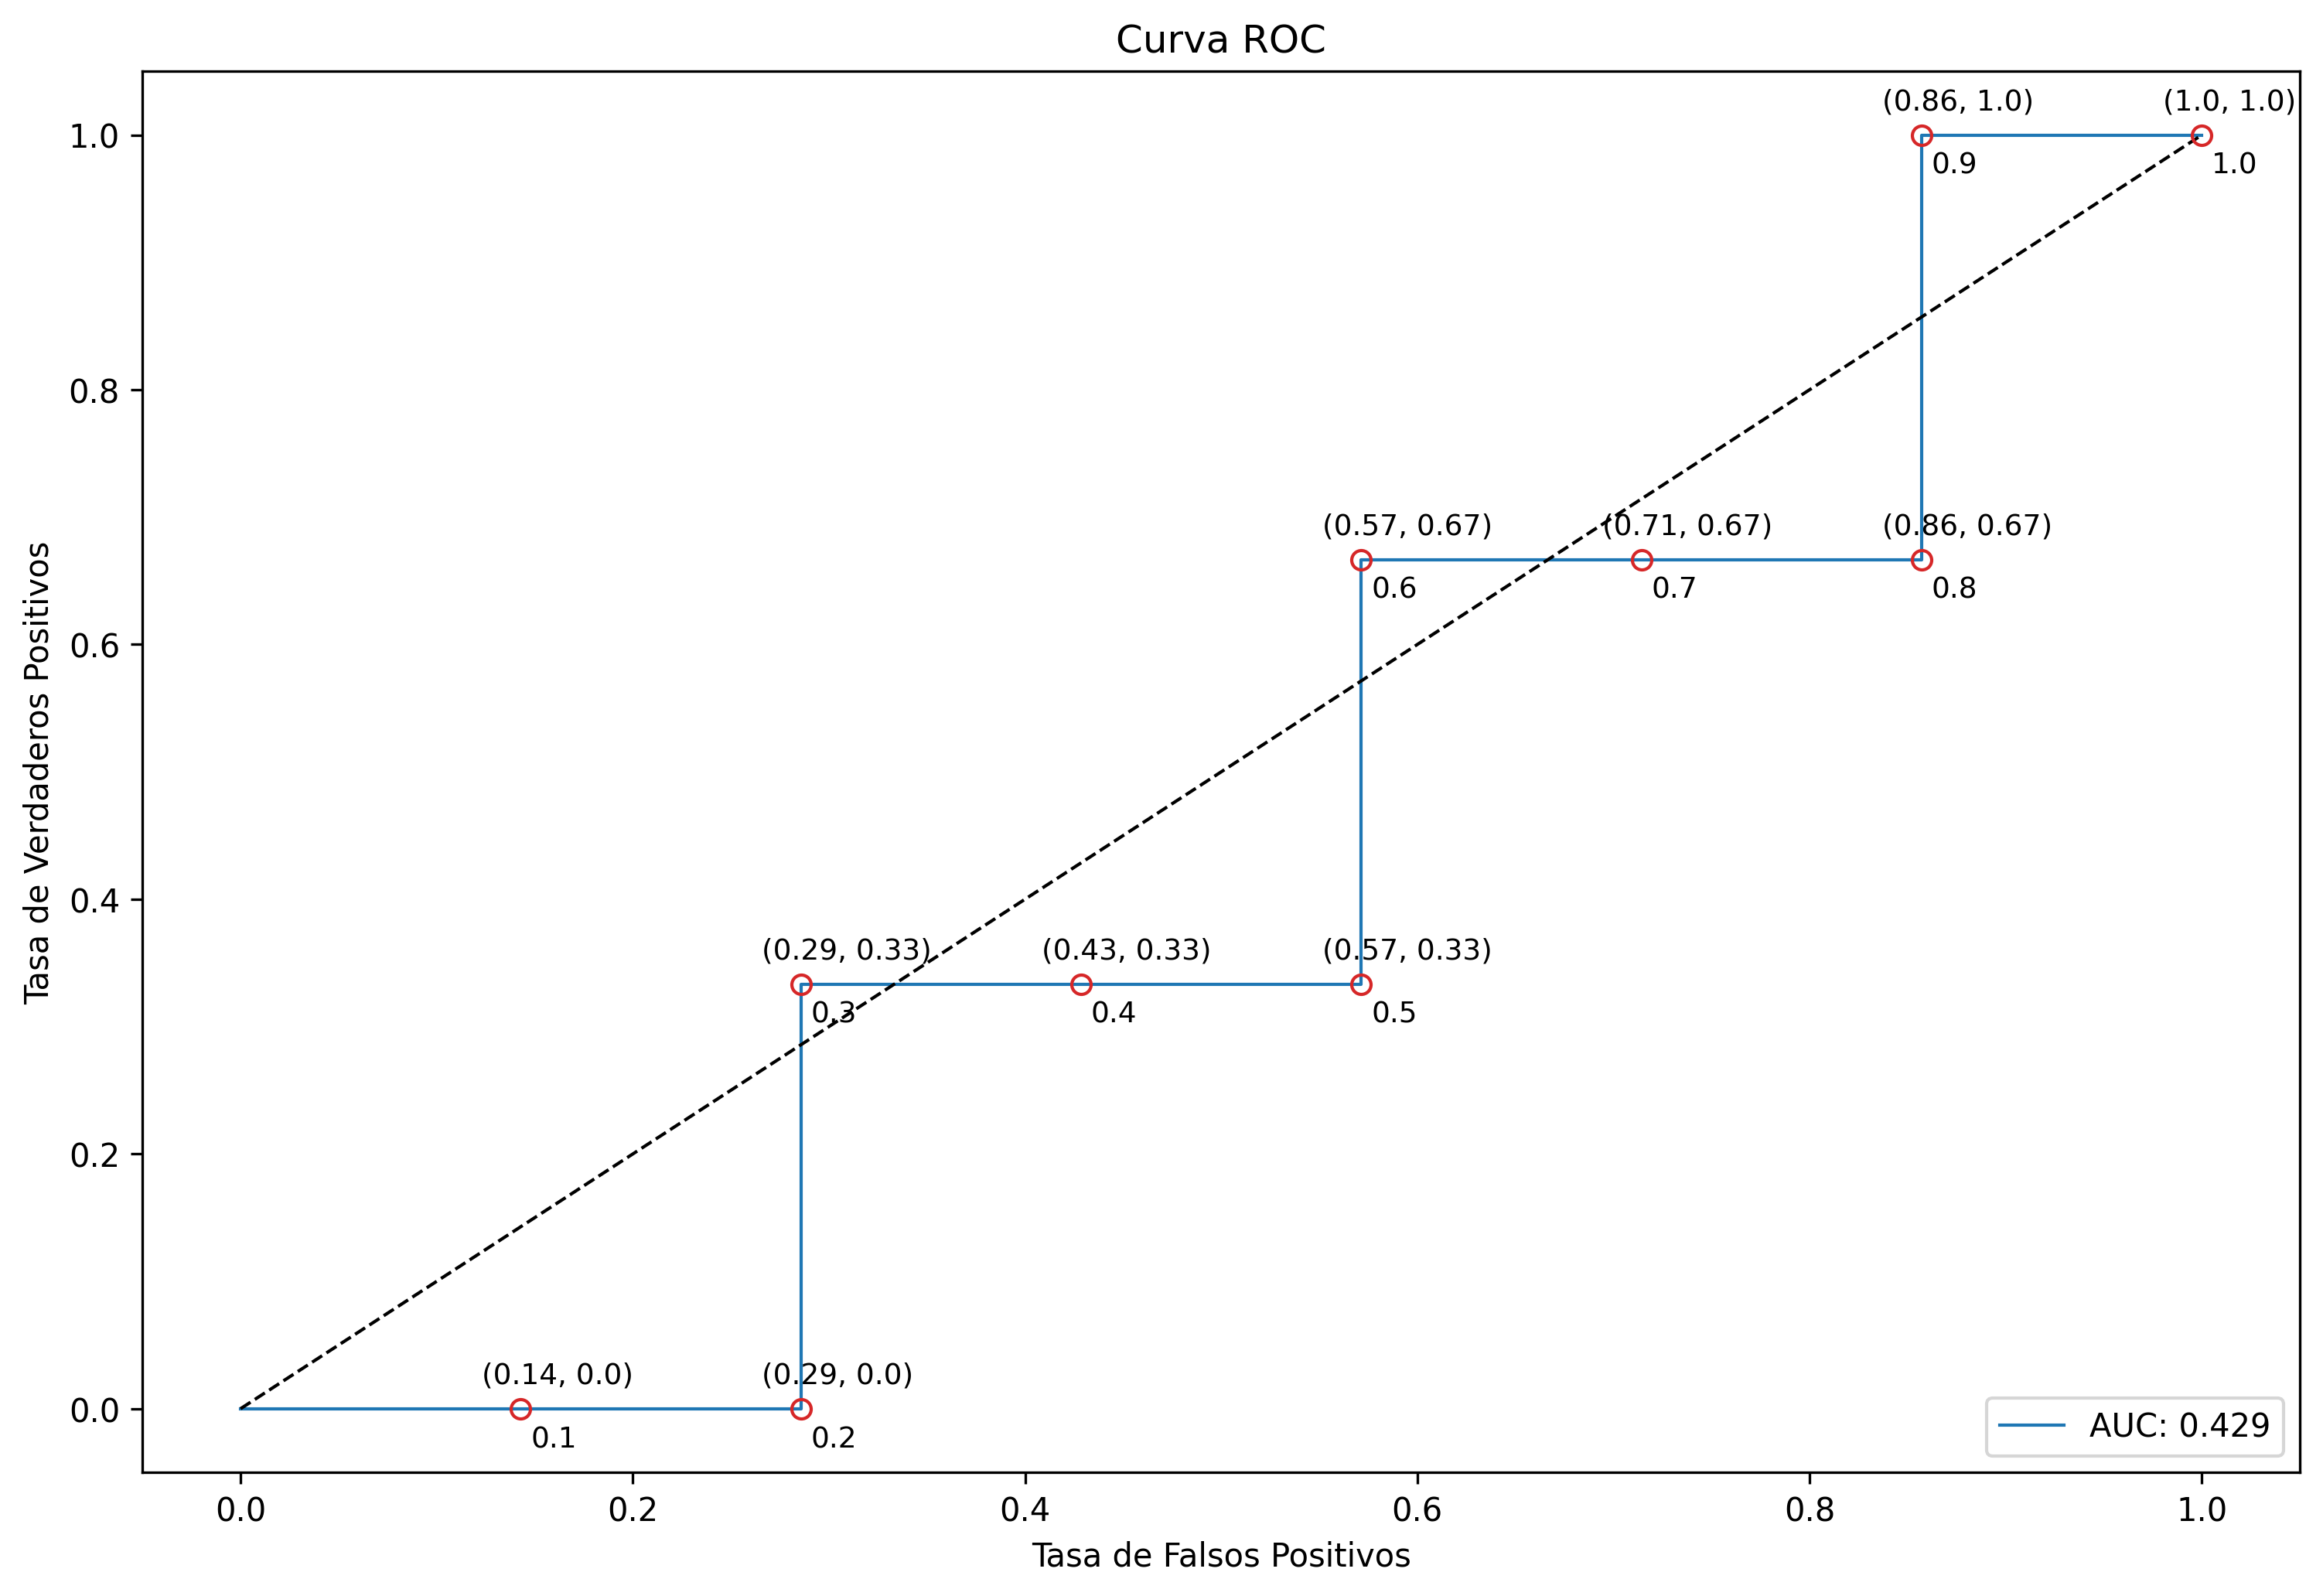

In [127]:
Clase = np.array(datos['Clase'].tolist())
Score = np.array(datos['Score'].tolist())

print(Clase)
print(Score)

fig, ax = plt.subplots(1,1,figsize = (12,8), dpi = 300)
#Graficamos la curva ROC
plotROC(Clase, Score, pos_label = "p", ax = ax)

# Aquí se inicializan como en el Algoritmo
Umbral = min(Score)
Paso = (max(Score) - min(Score)) / 10

# Aquí se inicializan para que de igual a la corrida a pie
Umbral = 0.1
Paso = 0.1
N = 7 # Total negativos
P = 3 # Total positivos
TP = 0 
FP = 0

for i in range(0, 10):
    if Score[i] > Umbral:
        if Clase[i] == "p":
            TP = TP + 1
        else:
            FP = FP + 1
    else:
        if Clase[i] == "n":
            FP = FP + 1
        else:
            TP = TP + 1
            
    # Graficamos punto
    x = FP / N
    y = TP / P
    plt.plot(x, y, "o", mfc = "none", color = "tab:red")
    plt.annotate("({}, {})".format(round(x,2),round(y,2)), (x - 0.02, y + 0.02),
                fontsize = 9)
    plt.annotate(round(Umbral, 2), (x + 0.005, y - 0.03),fontsize = 9)
        
    # Imprimimos resultado
    print("========================")
    print("Punto i = ", i + 1, "\n")  
    print("Umbral = T = ", round(Umbral, 2), "\n")
    print("Tasa FP = ", round(x, 2), "\n")
    print("Tasa TP = ", round(y, 2), "\n\n")  
    Umbral = Umbral + Paso

En efecto, son los mismos puntos que obtuvimos con nuestro calculo a mano.